In [1]:
import scipy
from scipy.io import arff
import numpy as np
import pandas as pd 
from sklearn import preprocessing
import seaborn as sns


In [2]:
import os 
os.getcwd()

'C:\\Users\\PC1\\Phishing_NIDS'

In [4]:
# Load Datasets
def loadDataset(file_name):
    df = pd.read_csv(file_name)
    return df

df_train = loadDataset("Train_Dataset/Training_data_INPDS.csv")
df_test = loadDataset("Train_Dataset/Test_dataset_NIDS.csv")

C:\Users\PC1\AppData\Local\Temp/ipykernel_21228/4223727134.py:6: DtypeWarning: Columns (9,10,12,13,15,17,18,20,21,24,25,27,28,30) have mixed types.Specify dtype option on import or set low_memory=False.
  df_train = loadDataset("Train_Dataset/Training_data_INPDS.csv")


In [5]:
df_train.columns

Index(['Country', 'ASN', 'TTL', 'IP', 'Domain', 'State', 'Registrant_Name',
       'Country.1', 'Creation_Date_Time', 'hex_32', 'hex_8', 'Domain_Name',
       'Alexa_Rank', 'subdomain', 'Organization', 'len', 'longest_word',
       'oc_32', 'shortened', '1gram', 'obfuscate_at_sign', 'entropy',
       'Domain_Age', 'tld', 'dec_8', 'dec_32', 'Emails', 'numeric_percentage',
       'puny_coded', 'typos', 'oc_8', '3gram', 'char_distribution', '2gram',
       'Registrar', 'sld', 'Name_Server_Count', 'Page_Rank', 'label'],
      dtype='object')

In [6]:
df_test.columns

Index(['ID_packet', 'IP_src', 'UDP_sport', 'IP_dst', 'UDP_dport', 'DNS_id',
       'Domaine', '1gram', '2gram', '3gram', 'entropy', 'Country', 'tld',
       'DNS_qr', 'DNS_qd', 'DNS_qdtype', 'type_table', 'Creation_Date_Time',
       'Exp_Date_Time', 'whois_updatedDate', 'dot_count', 'len', 'digit_count',
       'special_count', 'hyphen_count', 'double_slash', 'single_slash',
       'at_the_rate'],
      dtype='object')

In [7]:
df_train.label.value_counts()

0    495663
1      5001
Name: label, dtype: int64

In [9]:
df_train.apply(lambda x:sum(x.isnull()),axis=0)

Country               110650
ASN                   110592
TTL                        0
IP                    109386
Domain                     3
State                 278477
Registrant_Name       487125
Country.1             243210
Creation_Date_Time    133405
hex_32                     0
hex_8                      2
Domain_Name            98320
Alexa_Rank             54882
subdomain                  3
Organization          296403
len                        0
longest_word             135
oc_32                      0
shortened               1362
1gram                      0
obfuscate_at_sign          0
entropy                   19
Domain_Age             54803
tld                        1
dec_8                      1
dec_32                   304
Emails                173072
numeric_percentage         0
puny_coded                 0
typos                      0
oc_8                       0
3gram                      0
char_distribution          0
2gram                    106
Registrar     

In [9]:
df['Entropy_DirectoryName'].mean()

0.6774585199685779

In [10]:
df['Entropy_DirectoryName'].fillna('0.6774585199685779',inplace=True)

In [11]:
df['Entropy_Filename'].mean()

0.715833931542551

In [12]:
df['Entropy_Filename'].fillna('0.715833931542551',inplace=True)

In [13]:
df['Entropy_Extension'].mean()

0.5082122870595988

In [14]:
df['Entropy_Extension'].fillna('0.5082122870595986',inplace=True)

In [15]:
df['Entropy_Afterpath'].mean()

-0.2088996833661899

In [16]:
df['avgpathtokenlen'].fillna(0)

0        4.400000
1        6.000000
2        5.800000
3        5.500000
4        7.333334
           ...   
36702    3.666667
36703    8.461538
36704    3.375000
36705    3.600000
36706    3.250000
Name: avgpathtokenlen, Length: 36707, dtype: float64

In [17]:
df['NumberRate_Extension'].mean()

0.0375794056269783

In [18]:
df['NumberRate_Extension'].fillna('0.03757940562697829',inplace=True)

In [19]:
df['NumberRate_AfterPath'].value_counts()

-1.000000    20481
 0.000000     1791
 0.400000      662
 0.085106      451
 0.500000      315
             ...  
 0.060811        1
 0.027523        1
 0.215686        1
 0.126582        1
 0.162076        1
Name: NumberRate_AfterPath, Length: 1851, dtype: int64

In [20]:
df['NumberRate_AfterPath'].fillna(' 0.000000',inplace=True)

In [21]:
df['NumberRate_FileName'].fillna('0',inplace=True)

In [22]:
df['NumberRate_DirectoryName'].mean()

0.0037678746762322742

In [23]:
df['NumberRate_DirectoryName'].fillna('0.0037678746762322742',inplace=True)

In [24]:
df['avgpathtokenlen'].value_counts()

2.666667    4464
3.000000    1743
4.250000    1276
3.666667    1121
4.000000    1035
            ... 
4.840000       1
3.640000       1
3.550000       1
4.476191       1
1.928572       1
Name: avgpathtokenlen, Length: 835, dtype: int64

In [25]:
df['NumberRate_FileName'].fillna(' 0.000000',inplace=True)

In [26]:
df['avgpathtokenlen'].fillna('2.6666667',inplace=True)

In [27]:




df['avgpathtokenlen'].fillna('2.6666667',inplace=True)

In [28]:
df['Entropy_Afterpath'].fillna('0',inplace=True)

In [29]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Querylength              0
domain_token_count       0
path_token_count         0
avgdomaintokenlen        0
longdomaintokenlen       0
                        ..
Entropy_DirectoryName    0
Entropy_Filename         0
Entropy_Extension        0
Entropy_Afterpath        0
URL_Type_obf_Type        0
Length: 80, dtype: int64

In [10]:
df.corr()

,id_ip,who_is,https,version,ihl,len_IP,tos,frag,ttl,proto,...,dot_count,url_len,digit_count,special_count,hyphen_count,double_slash,single_slash,at_the_rate,protocol,protocol_count
id_ip,1.000000,NaN,NaN,NaN,NaN,0.106226,NaN,NaN,NaN,NaN,...,-0.041530,-0.022143,-0.000845,NaN,0.026410,NaN,NaN,NaN,0.756179,-0.013894
who_is,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
version,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ihl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
len_IP,0.106226,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,-0.096678,-0.015712,-0.068410,NaN,-0.013408,NaN,NaN,NaN,0.116560,-0.021488
tos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ttl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
proto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='digit_count', ylabel='Density'>

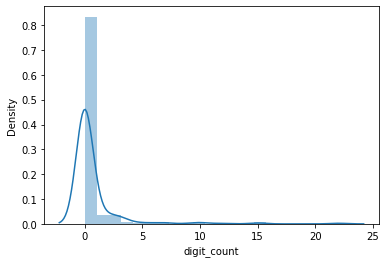

In [12]:
sns.distplot(df['digit_count'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='url_len', ylabel='Density'>

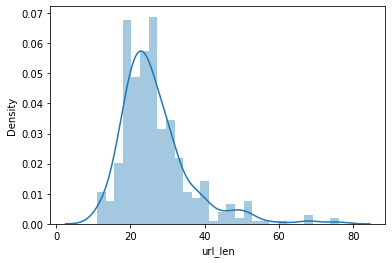

In [13]:
sns.distplot(df['url_len'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dot_count', ylabel='Density'>

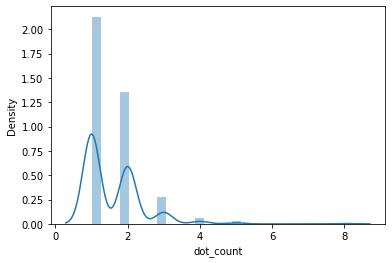

In [14]:
sns.distplot(df['dot_count'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='special_count', ylabel='Density'>

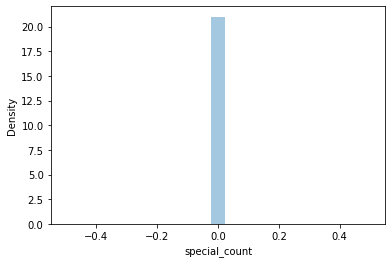

In [15]:
sns.distplot(df['special_count'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hyphen_count', ylabel='Density'>

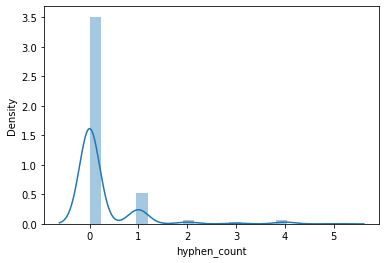

In [16]:
sns.distplot(df['hyphen_count'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='double_slash', ylabel='Density'>

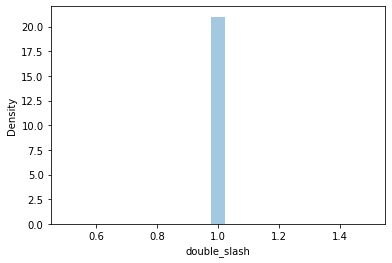

In [17]:
sns.distplot(df['double_slash'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='protocol_count', ylabel='Density'>

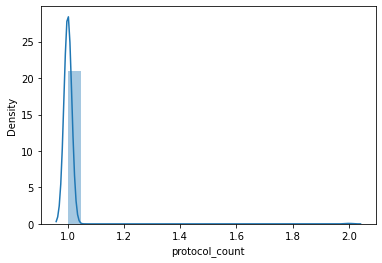

In [18]:
sns.distplot(df['protocol_count'])

In [42]:
df["NumberRate_AfterPath"]= df["NumberRate_AfterPath"].astype(float) 
df["Entropy_URL"]= df["Entropy_URL"].astype(float) 
df["Entropy_Extension"]= df["Entropy_Extension"].astype(float) 
df["Entropy_Filename"]= df["Entropy_Filename"].astype(float) 
df["Entropy_DirectoryName"]= df["Entropy_DirectoryName"].astype(float) 
df["Entropy_Domain"]= df["Entropy_Domain"].astype(float) 
df["Entropy_URL"]= df["Entropy_URL"].astype(float) 
df["NumberRate_URL"]= df["NumberRate_URL"].astype(float) 
df["NumberRate_Domain"]= df["NumberRate_Domain"].astype(float) 
df["NumberRate_DirectoryName"]= df["NumberRate_DirectoryName"].astype(float) 
df["NumberRate_FileName"]= df["NumberRate_FileName"].astype(float) 
df["NumberRate_Extension"]= df["NumberRate_AfterPath"].astype(float)
df["NumberRate_AfterPath"]= df["NumberRate_AfterPath"].astype(float)

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Entropy_URL', ylabel='Density'>

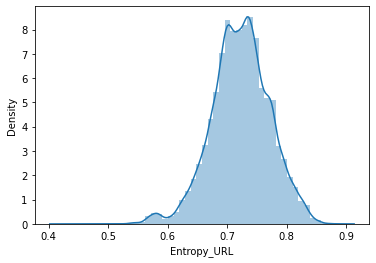

In [43]:
sns.distplot(df['Entropy_URL'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SymbolCount_Afterpath', ylabel='Density'>

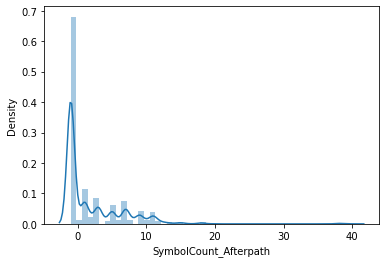

In [44]:
sns.distplot(df['SymbolCount_Afterpath'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SymbolCount_Extension', ylabel='Density'>

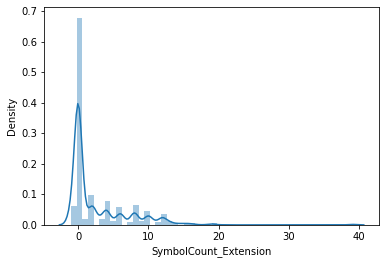

In [45]:
sns.distplot(df['SymbolCount_Extension'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SymbolCount_FileName', ylabel='Density'>

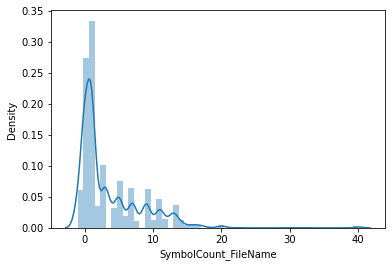

In [46]:
sns.distplot(df['SymbolCount_FileName'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SymbolCount_Directoryname', ylabel='Density'>

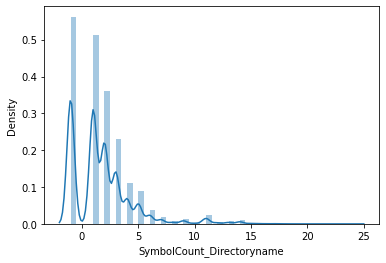

In [47]:
sns.distplot(df['SymbolCount_Directoryname'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SymbolCount_Domain', ylabel='Density'>

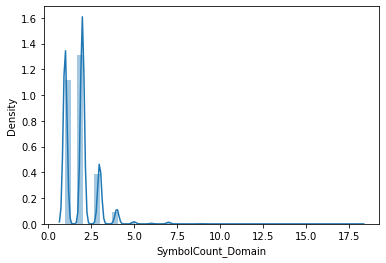

In [48]:
sns.distplot(df['SymbolCount_Domain'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SymbolCount_URL', ylabel='Density'>

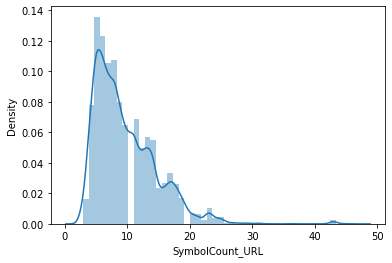

In [49]:
sns.distplot(df['SymbolCount_URL'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberRate_AfterPath', ylabel='Density'>

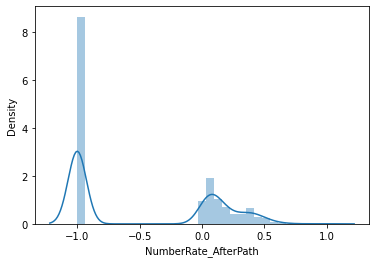

In [50]:
sns.distplot(df['NumberRate_AfterPath'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberRate_Extension', ylabel='Density'>

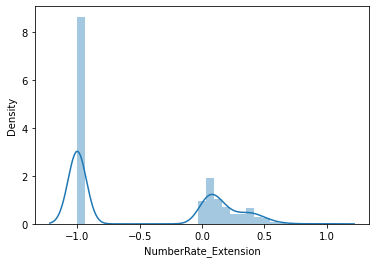

In [51]:
sns.distplot(df['NumberRate_Extension'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberRate_FileName', ylabel='Density'>

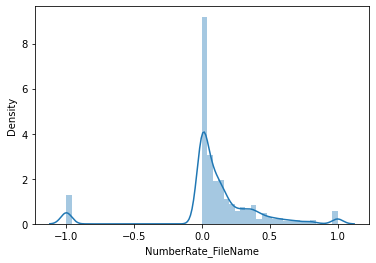

In [52]:
sns.distplot(df['NumberRate_FileName'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberRate_DirectoryName', ylabel='Density'>

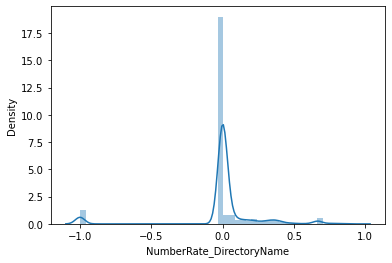

In [53]:
sns.distplot(df['NumberRate_DirectoryName'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberRate_Domain', ylabel='Density'>

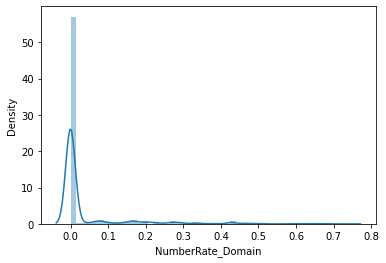

In [54]:
sns.distplot(df['NumberRate_Domain'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberRate_URL', ylabel='Density'>

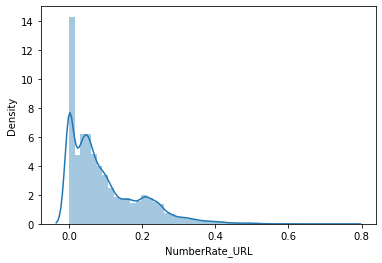

In [55]:
sns.distplot(df['NumberRate_URL'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delimeter_Count', ylabel='Density'>

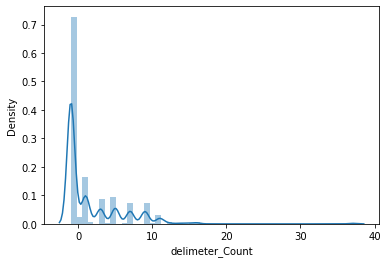

In [56]:
sns.distplot(df['delimeter_Count'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delimeter_path', ylabel='Density'>

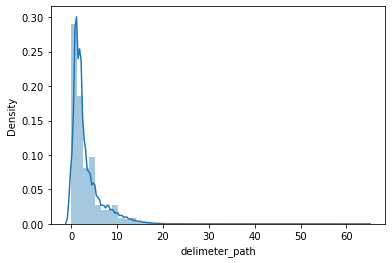

In [57]:
sns.distplot(df['delimeter_path'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spcharUrl', ylabel='Density'>

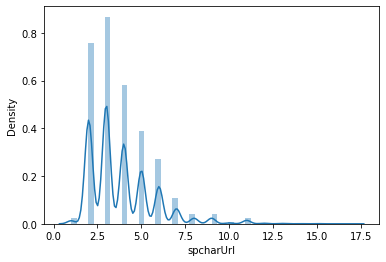

In [58]:
sns.distplot(df['spcharUrl'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='URLQueries_variable', ylabel='Density'>

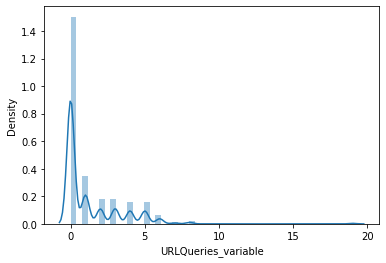

In [59]:
sns.distplot(df['URLQueries_variable'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='URL_sensitiveWord', ylabel='Density'>

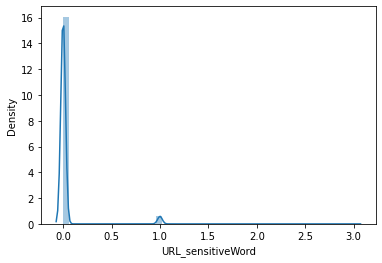

In [60]:
sns.distplot(df['URL_sensitiveWord'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Arguments_LongestWordLength', ylabel='Density'>

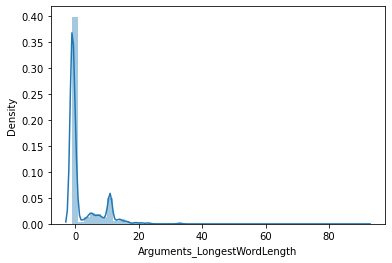

In [61]:
sns.distplot(df['Arguments_LongestWordLength'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sub-Directory_LongestWordLength', ylabel='Density'>

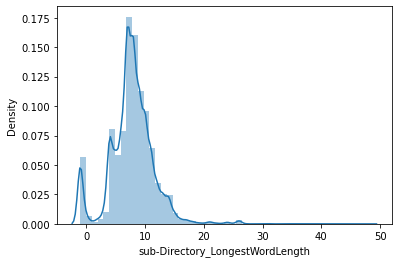

In [62]:

sns.distplot(df['sub-Directory_LongestWordLength'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Path_LongestWordLength', ylabel='Density'>

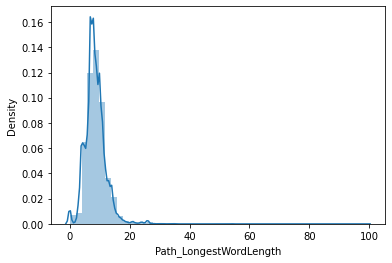

In [63]:
sns.distplot(df['Path_LongestWordLength'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Domain_LongestWordLength', ylabel='Density'>

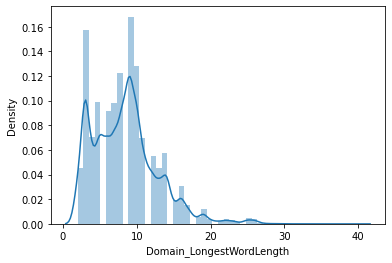

In [64]:
sns.distplot(df['Domain_LongestWordLength'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LongestPathTokenLength', ylabel='Density'>

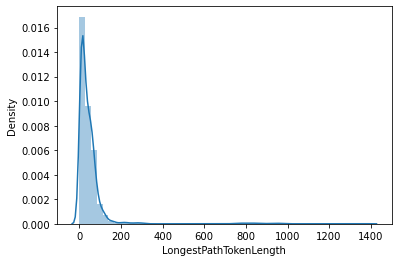

In [65]:

sns.distplot(df['LongestPathTokenLength'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Query_LetterCount', ylabel='Density'>

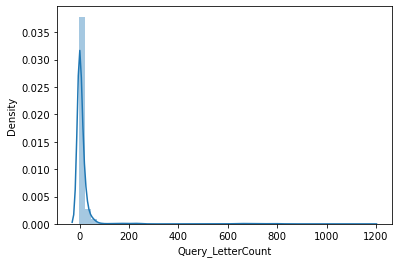

In [66]:
sns.distplot(df['Query_LetterCount'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Extension_LetterCount', ylabel='Density'>

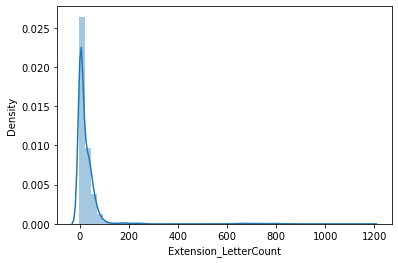

In [67]:
sns.distplot(df['Extension_LetterCount'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Directory_LetterCount', ylabel='Density'>

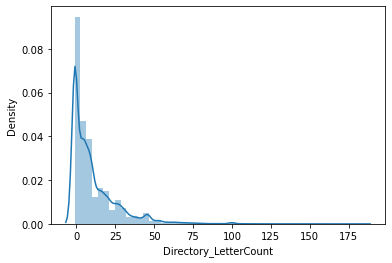

In [68]:
sns.distplot(df['Directory_LetterCount'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='host_letter_count', ylabel='Density'>

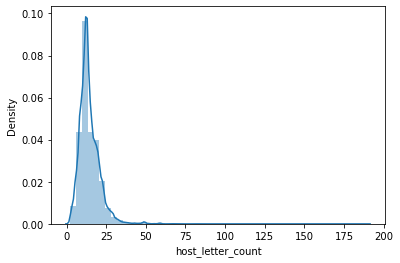

In [69]:
sns.distplot(df['host_letter_count'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='URL_Letter_Count', ylabel='Density'>

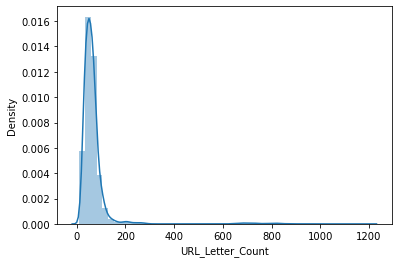

In [70]:
sns.distplot(df['URL_Letter_Count'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Query_DigitCount', ylabel='Density'>

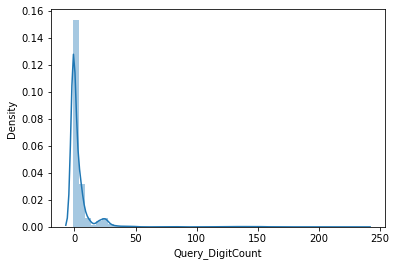

In [71]:
sns.distplot(df['Query_DigitCount'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Extension_DigitCount', ylabel='Density'>

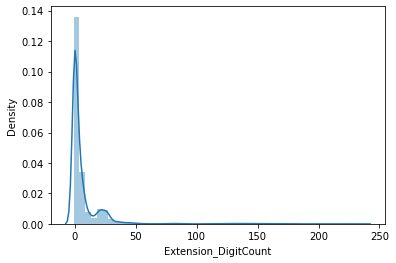

In [72]:
sns.distplot(df['Extension_DigitCount'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Filename_LetterCount', ylabel='Density'>

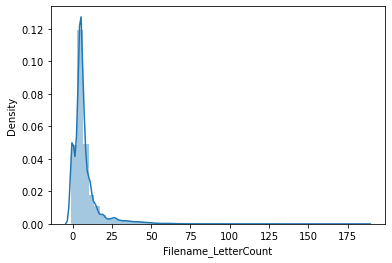

In [73]:
sns.distplot(df['Filename_LetterCount'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Directory_DigitCount', ylabel='Density'>

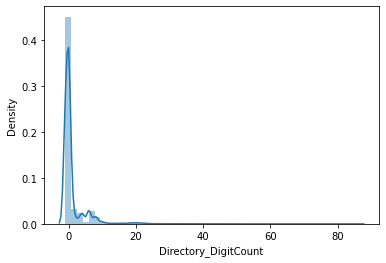

In [74]:
sns.distplot(df['Directory_DigitCount'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='host_DigitCount', ylabel='Density'>

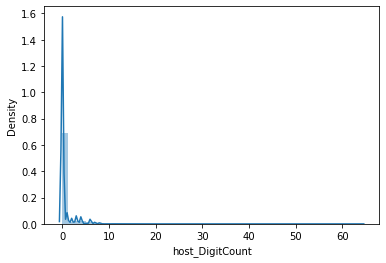

In [75]:
sns.distplot(df['host_DigitCount'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='URL_DigitCount', ylabel='Density'>

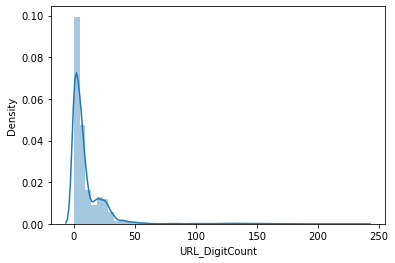

In [76]:
sns.distplot(df['URL_DigitCount'])

C:\Users\PC1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LongestVariableValue', ylabel='Density'>

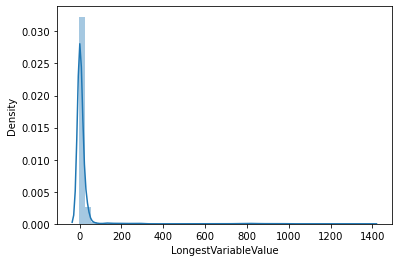

In [77]:
sns.distplot(df['LongestVariableValue'])

In [19]:
#df.drop(["Querylength", "domain_token_count",
#        "avgpathtokenlen", "tld", "ldl_url", "ldl_domain", "ldl_path",
#       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
 #      'dld_filename', 'dld_getArg',  'domainlength', 'pathLength',
  #     'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen',
   #    'ArgUrlRatio', 'argDomanRatio', 'pathDomainRatio',
    #   'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
     #  'ISIpAddressInDomainName', 'CharacterContinuityRate',
     #  'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
      # 'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       ##'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
   #    'Directory_LetterCount', 'Filename_LetterCount',
    #   'Extension_LetterCount', 'Query_LetterCount', 'LongestPathTokenLength', 'Path_LongestWordLength',
     #  'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength',
      # 'URL_sensitiveWord', 'URLQueries_variable', 'spcharUrl',
       #'delimeter_Domain', 'delimeter_path', 'delimeter_Count', 'NumberRate_Domain', 'NumberRate_DirectoryName',
    #   'NumberRate_FileName', 'NumberRate_Extension', 'NumberRate_AfterPath', 'SymbolCount_Domain', 'SymbolCount_Directoryname',
     #  'SymbolCount_FileName', 'SymbolCount_Extension',
      # 'SymbolCount_Afterpath', 'Entropy_Domain',
     #  'Entropy_DirectoryName', 'Entropy_Extension',
     #  'Entropy_Afterpath'],axis=1,inplace = True) 
  

In [20]:
df

,url,id_ip,domaine,geo_loc,tld,who_is,https,src,dst,version,...,dot_count,url_len,digit_count,special_count,hyphen_count,double_slash,single_slash,at_the_rate,protocol,protocol_count
0,https://shiptoislands.com,6567,www.shiptoislands.com,unkown,com,False,False,10.0.2.15,10.1.27.100,4,...,1,25,0,0,0,1,2,0,0,1
1,https://hixinsite.com,1140,www.hixinsite.com,unkown,com,False,False,192.168.8.1,10.0.2.15,4,...,1,21,0,0,0,1,2,0,0,1
2,http://johnbarclay.ca,53559,www.johnbarclay.ca,unkown,ca,False,False,10.0.2.15,192.168.8.1,4,...,1,21,0,0,0,1,2,0,1,1
3,http://johnbarclay.ca,53559,www.johnbarclay.ca,unkown,ca,False,False,192.168.8.1,10.0.2.15,4,...,1,21,0,0,0,1,2,0,1,1
4,http://mnstuff.com,57783,www.mnstuff.com,unkown,com,False,False,10.0.2.15,192.168.8.1,4,...,1,18,0,0,0,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,http://gosnellspodiatry.com.au,31400,www.gosnellspodiatry.com.au,unkown,com.au,False,False,10.0.2.15,192.168.8.1,4,...,2,30,0,0,0,1,2,0,1,1
447,http://betasus17.blogspot.com,19374,www.betasus17.blogspot.com,unkown,blogspot.com,False,False,10.0.2.15,10.1.27.100,4,...,2,29,2,0,0,1,2,0,1,1
448,http://2lyk-chort.thess.sch.gr,61174,www.2lyk-chort.thess.sch.gr,unkown,gr,False,False,192.168.8.1,10.0.2.15,4,...,3,30,1,0,1,1,2,0,1,1
449,http://yourfitnesscorner.com,61184,www.yourfitnesscorner.com,unkown,com,False,False,192.168.8.1,10.0.2.15,4,...,1,28,0,0,0,1,2,0,1,1


In [21]:
df.corr()

,id_ip,who_is,https,version,ihl,len_IP,tos,frag,ttl,proto,...,dot_count,url_len,digit_count,special_count,hyphen_count,double_slash,single_slash,at_the_rate,protocol,protocol_count
id_ip,1.000000,NaN,NaN,NaN,NaN,0.106226,NaN,NaN,NaN,NaN,...,-0.041530,-0.022143,-0.000845,NaN,0.026410,NaN,NaN,NaN,0.756179,-0.013894
who_is,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
version,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ihl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
len_IP,0.106226,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,-0.096678,-0.015712,-0.068410,NaN,-0.013408,NaN,NaN,NaN,0.116560,-0.021488
tos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ttl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
proto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle=df
dfle.label=le.fit_transform(df.label)
df

,url,id_ip,domaine,geo_loc,tld,who_is,https,src,dst,version,...,dot_count,url_len,digit_count,special_count,hyphen_count,double_slash,single_slash,at_the_rate,protocol,protocol_count
0,https://shiptoislands.com,6567,www.shiptoislands.com,unkown,com,False,False,10.0.2.15,10.1.27.100,4,...,1,25,0,0,0,1,2,0,0,1
1,https://hixinsite.com,1140,www.hixinsite.com,unkown,com,False,False,192.168.8.1,10.0.2.15,4,...,1,21,0,0,0,1,2,0,0,1
2,http://johnbarclay.ca,53559,www.johnbarclay.ca,unkown,ca,False,False,10.0.2.15,192.168.8.1,4,...,1,21,0,0,0,1,2,0,1,1
3,http://johnbarclay.ca,53559,www.johnbarclay.ca,unkown,ca,False,False,192.168.8.1,10.0.2.15,4,...,1,21,0,0,0,1,2,0,1,1
4,http://mnstuff.com,57783,www.mnstuff.com,unkown,com,False,False,10.0.2.15,192.168.8.1,4,...,1,18,0,0,0,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,http://gosnellspodiatry.com.au,31400,www.gosnellspodiatry.com.au,unkown,com.au,False,False,10.0.2.15,192.168.8.1,4,...,2,30,0,0,0,1,2,0,1,1
447,http://betasus17.blogspot.com,19374,www.betasus17.blogspot.com,unkown,blogspot.com,False,False,10.0.2.15,10.1.27.100,4,...,2,29,2,0,0,1,2,0,1,1
448,http://2lyk-chort.thess.sch.gr,61174,www.2lyk-chort.thess.sch.gr,unkown,gr,False,False,192.168.8.1,10.0.2.15,4,...,3,30,1,0,1,1,2,0,1,1
449,http://yourfitnesscorner.com,61184,www.yourfitnesscorner.com,unkown,com,False,False,192.168.8.1,10.0.2.15,4,...,1,28,0,0,0,1,2,0,1,1


In [23]:
cor=df.corr()

<AxesSubplot:>

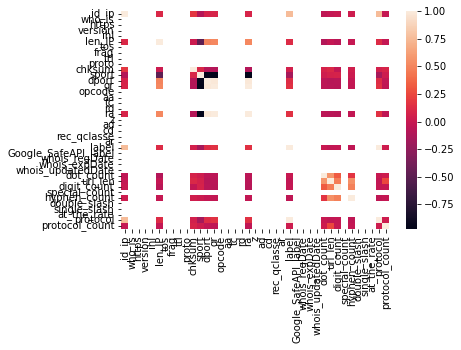

In [24]:
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns)

In [25]:
df.cov()

,id_ip,who_is,https,version,ihl,len_IP,tos,frag,ttl,proto,...,dot_count,url_len,digit_count,special_count,hyphen_count,double_slash,single_slash,at_the_rate,protocol,protocol_count
id_ip,3.202439e+08,0.0,0.0,0.0,0.0,136671.148036,0.0,0.0,0.0,0.0,...,-600.341552,-3788.157182,-37.355881,0.0,330.601587,0.0,0.0,0.0,5686.939374,-11.708041
who_is,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
https,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
version,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
ihl,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
len_IP,1.366711e+05,0.0,0.0,0.0,0.0,5169.008002,0.0,0.0,0.0,0.0,...,-5.614678,-10.799187,-12.155393,0.0,-0.674329,0.0,0.0,0.0,3.521828,-0.072747
tos,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
frag,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
ttl,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
proto,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


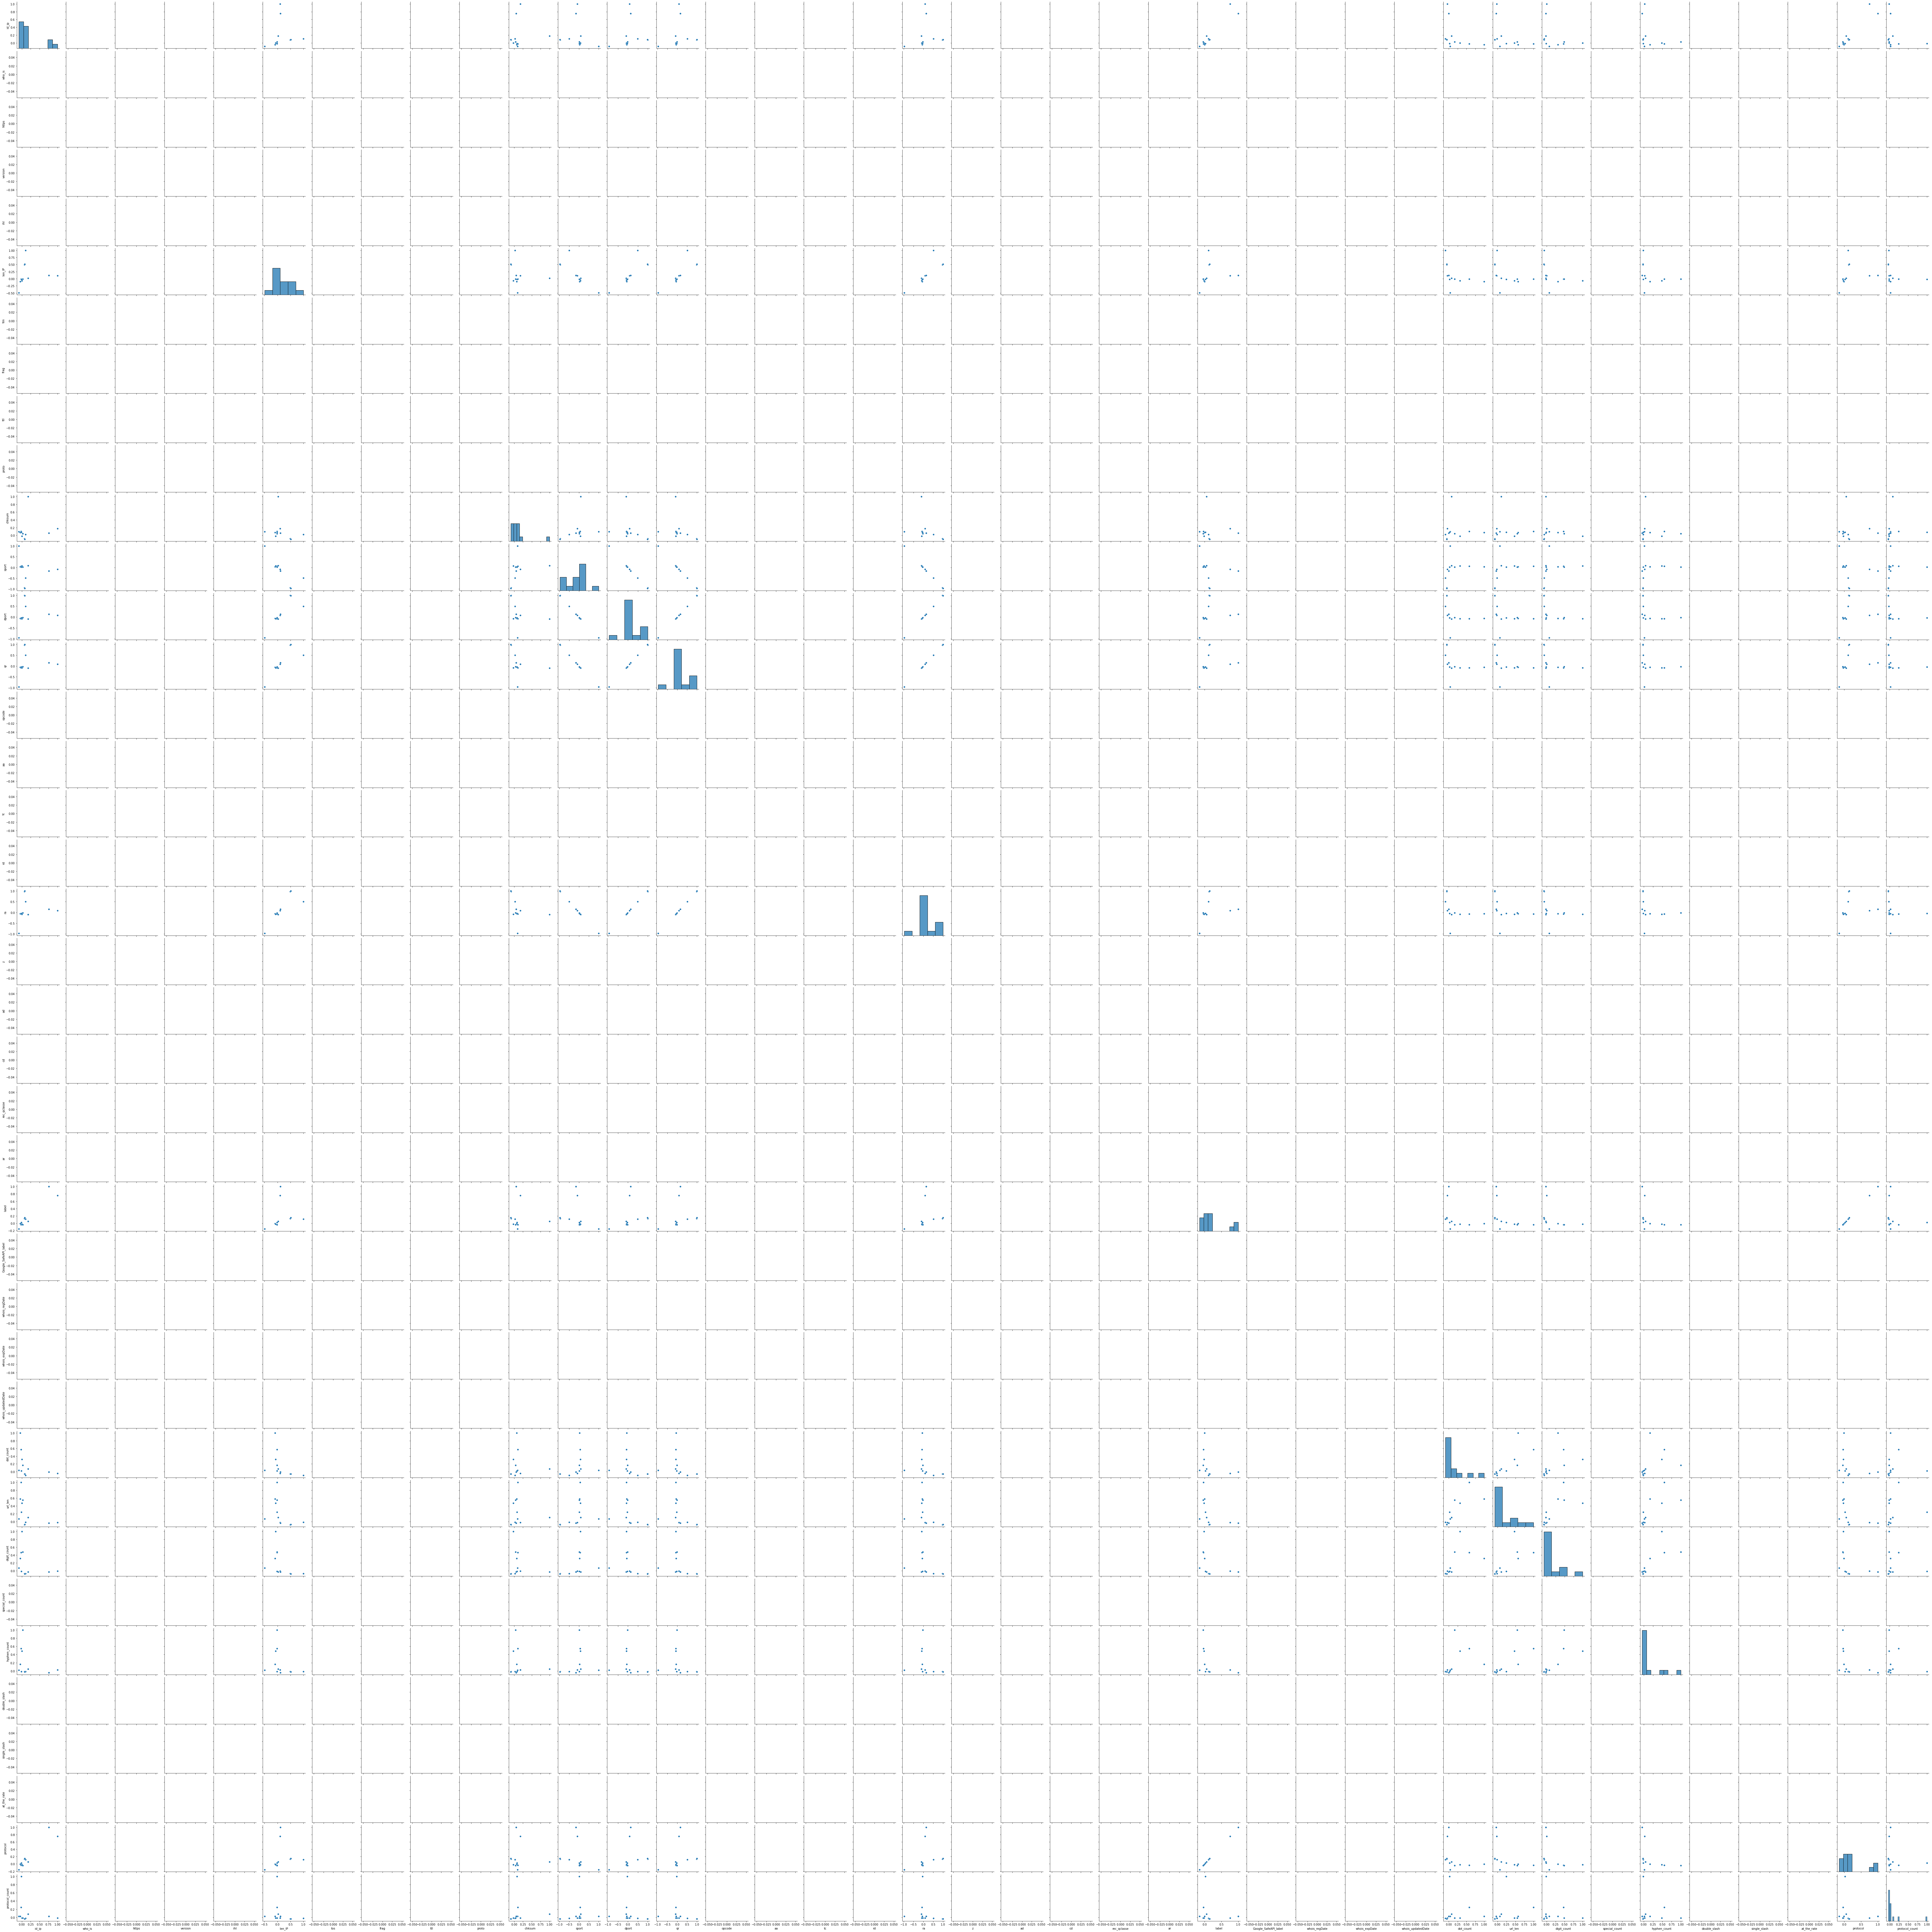

In [26]:
import seaborn as sns
sns.pairplot(cor)

In [86]:
Z=df.iloc[:,1:13]

In [87]:
Z

,avgdomaintokenlen,longdomaintokenlen,charcompvowels,charcompace,urlLen,pathurlRatio,domainUrlRatio,Domain_LongestWordLength,NumberRate_URL,SymbolCount_URL,Entropy_URL,Entropy_Filename
0,5.500000,14,8,3,58,0.448276,0.431034,14,0.017241,8,0.726298,0.850608
1,5.500000,14,12,4,66,0.515151,0.378788,14,0.000000,8,0.688635,0.859793
2,5.500000,14,12,5,65,0.507692,0.384615,14,0.000000,8,0.695049,0.801880
3,5.500000,14,32,16,109,0.706422,0.229358,14,0.000000,8,0.640130,0.663210
4,5.500000,14,18,11,81,0.604938,0.308642,14,0.000000,8,0.681307,0.804526
...,...,...,...,...,...,...,...,...,...,...,...,...
36702,5.750000,12,20,24,146,0.773973,0.178082,12,0.212329,19,0.690555,0.690227
36703,3.750000,8,24,23,147,0.829932,0.122449,8,0.142857,23,0.665492,0.674400
36704,6.666666,16,41,34,246,0.882114,0.089431,16,0.231707,26,0.656807,0.713622
36705,4.333334,9,15,13,116,0.810345,0.129310,9,0.215517,14,0.725963,0.745932


In [88]:
y=df.iloc[:,0]

In [89]:
y

0         5
1         5
2         5
3        12
4         6
         ..
36702    14
36703    13
36704    27
36705    13
36706    25
Name: path_token_count, Length: 36707, dtype: int64

# Stats model 

In [90]:
x=df[['path_token_count','avgdomaintokenlen','Entropy_URL','charcompvowels','charcompace','pathurlRatio','domainUrlRatio','SymbolCount_URL']]

In [91]:
T=df[['SymbolCount_URL','Entropy_URL','pathurlRatio']]

In [92]:
A=df["avgdomaintokenlen"]

In [93]:
import statsmodels.api as sm
model1=sm.OLS(y,A).fit()

In [94]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.691
Model:                            OLS   Adj. R-squared (uncentered):              0.691
Method:                 Least Squares   F-statistic:                          8.204e+04
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:46:18   Log-Likelihood:                     -1.1478e+05
No. Observations:               36707   AIC:                                  2.296e+05
Df Residuals:                   36706   BIC:                                  2.296e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
avgdomaintokenlen     1.4332      0.005    286.428      0.000       1.423       1.443
==============================================================================
Omnibus:                     2405.693   Durbin-Watson:                   0.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11603.864
Skew:                           0.066   Prob(JB):                         0.00
Kurtosis:                       5.751   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
B=df["longdomaintokenlen"]
model2=sm.OLS(y,B).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.622
Model:                            OLS   Adj. R-squared (uncentered):              0.622
Method:                 Least Squares   F-statistic:                          6.030e+04
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:46:20   Log-Likelihood:                     -1.1849e+05
No. Observations:               36707   AIC:                                  2.370e+05
Df Residuals:                   36706   BIC:                                  2.370e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
longdomaintokenlen     0.7186      0.003    245.557      0.000       0.713       0.724
==============================================================================
Omnibus:                     3548.979   Durbin-Watson:                   0.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20256.585
Skew:                          -0.289   Prob(JB):                         0.00
Kurtosis:                       6.593   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
C=df["charcompvowels"]
model3=sm.OLS(y,C).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.649
Model:                            OLS   Adj. R-squared (uncentered):              0.649
Method:                 Least Squares   F-statistic:                          6.775e+04
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:46:22   Log-Likelihood:                     -1.1713e+05
No. Observations:               36707   AIC:                                  2.343e+05
Df Residuals:                   36706   BIC:                                  2.343e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
charcompvowels     0.3984      0.002    260.286      0.000       0.395       0.401
==============================================================================
Omnibus:                    40249.098   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3964184.467
Skew:                          -5.605   Prob(JB):                         0.00
Kurtosis:                      52.661   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
D=df["charcompace"]
model4=sm.OLS(y,D).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.541
Model:                            OLS   Adj. R-squared (uncentered):              0.541
Method:                 Least Squares   F-statistic:                          4.333e+04
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:46:23   Log-Likelihood:                     -1.2202e+05
No. Observations:               36707   AIC:                                  2.440e+05
Df Residuals:                   36706   BIC:                                  2.441e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
charcompace     0.4901      0.002    208.152      0.000       0.485       0.495
==============================================================================
Omnibus:                    38828.486   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3117667.684
Skew:                          -5.344   Prob(JB):                         0.00
Kurtosis:                      46.866   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
E=df["urlLen"]
model5=sm.OLS(y,E).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.480
Model:                            OLS   Adj. R-squared (uncentered):              0.480
Method:                 Least Squares   F-statistic:                          3.394e+04
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:46:25   Log-Likelihood:                     -1.2431e+05
No. Observations:               36707   AIC:                                  2.486e+05
Df Residuals:                   36706   BIC:                                  2.486e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
urlLen         0.0517      0.000    184.236      0.000       0.051       0.052
==============================================================================
Omnibus:                    38567.909   Durbin-Watson:                   1.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3069684.803
Skew:                          -5.284   Prob(JB):                         0.00
Kurtosis:                      46.536   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
F=df["pathurlRatio"]
model6=sm.OLS(y,F).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                          3.181e+05
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:46:26   Log-Likelihood:                         -94691.
No. Observations:               36707   AIC:                                  1.894e+05
Df Residuals:                   36706   BIC:                                  1.894e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
pathurlRatio    13.6445      0.024    563.983      0.000      13.597      13.692
==============================================================================
Omnibus:                    13929.068   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117291.437
Skew:                           1.598   Prob(JB):                         0.00
Kurtosis:                      11.153   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
G=df["domainUrlRatio"]
model7=sm.OLS(y,G).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.426
Model:                            OLS   Adj. R-squared (uncentered):              0.425
Method:                 Least Squares   F-statistic:                          2.719e+04
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:46:27   Log-Likelihood:                     -1.2615e+05
No. Observations:               36707   AIC:                                  2.523e+05
Df Residuals:                   36706   BIC:                                  2.523e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
domainUrlRatio    24.3187      0.147    164.883      0.000      24.030      24.608
==============================================================================
Omnibus:                     1258.019   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3300.150
Skew:                          -0.129   Prob(JB):                         0.00
Kurtosis:                       4.446   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
H=df["Domain_LongestWordLength"]
model8=sm.OLS(y,H).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.626
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                          6.135e+04
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:46:29   Log-Likelihood:                     -1.1829e+05
No. Observations:               36707   AIC:                                  2.366e+05
Df Residuals:                   36706   BIC:                                  2.366e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Domain_LongestWordLength     0.8234      0.003    247.694      0.000       0.817       0.830
==============================================================================
Omnibus:                     1499.187   Durbin-Watson:                   0.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4795.244
Skew:                           0.065   Prob(JB):                         0.00
Kurtosis:                       4.766   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
I=df["NumberRate_URL"]
model9=sm.OLS(y,I).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.444
Model:                            OLS   Adj. R-squared (uncentered):              0.444
Method:                 Least Squares   F-statistic:                          2.929e+04
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:46:30   Log-Likelihood:                     -1.2556e+05
No. Observations:               36707   AIC:                                  2.511e+05
Df Residuals:                   36706   BIC:                                  2.511e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
NumberRate_URL    48.8708      0.286    171.143      0.000      48.311      49.431
==============================================================================
Omnibus:                     2700.857   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6884.882
Skew:                          -0.435   Prob(JB):                         0.00
Kurtosis:                       4.935   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
G=df["SymbolCount_URL"]
model10=sm.OLS(y,G).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                          2.036e+05
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:46:31   Log-Likelihood:                     -1.0184e+05
No. Observations:               36707   AIC:                                  2.037e+05
Df Residuals:                   36706   BIC:                                  2.037e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
SymbolCount_URL     0.8350      0.002    451.256      0.000       0.831       0.839
==============================================================================
Omnibus:                    13918.695   Durbin-Watson:                   0.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91253.365
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                       9.954   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
H=df["Entropy_URL"]
model11=sm.OLS(y,H).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.780
Model:                            OLS   Adj. R-squared (uncentered):              0.780
Method:                 Least Squares   F-statistic:                          1.304e+05
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:46:32   Log-Likelihood:                     -1.0851e+05
No. Observations:               36707   AIC:                                  2.170e+05
Df Residuals:                   36706   BIC:                                  2.170e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Entropy_URL    12.1090      0.034    361.137      0.000      12.043      12.175
==============================================================================
Omnibus:                     7719.780   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23127.234
Skew:                           1.093   Prob(JB):                         0.00
Kurtosis:                       6.216   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
I=df["Entropy_Filename"]
model12=sm.OLS(y,I).fit()
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.538
Model:                            OLS   Adj. R-squared (uncentered):              0.538
Method:                 Least Squares   F-statistic:                          4.279e+04
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:46:34   Log-Likelihood:                     -1.2214e+05
No. Observations:               36707   AIC:                                  2.443e+05
Df Residuals:                   36706   BIC:                                  2.443e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Entropy_Filename     8.8240      0.043    206.847      0.000       8.740       8.908
==============================================================================
Omnibus:                    12597.796   Durbin-Watson:                   0.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46834.807
Skew:                           1.709   Prob(JB):                         0.00
Kurtosis:                       7.352   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
import statsmodels.api as sm
model13=sm.OLS(y,x).fit()


In [107]:
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.638e+32
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:46:36   Log-Likelihood:                      1.0703e+06
No. Observations:               36707   AIC:                                 -2.141e+06
Df Residuals:                   36699   BIC:                                 -2.141e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
path_token_count      1.0000    1.1e-16   9.08e+15      0.000       1.000       1.000
avgdomaintokenlen  4.441e-16   1.75e-16      2.542      0.011    1.02e-16    7.86e-16
Entropy_URL       -7.994e-15   6.45e-15     -1.239      0.215   -2.06e-14    4.65e-15
charcompvowels    -9.992e-16   6.97e-17    -14.329      0.000   -1.14e-15   -8.63e-16
charcompace       -5.551e-16   8.05e-17     -6.894      0.000   -7.13e-16   -3.97e-16
pathurlRatio      -1.998e-14   6.28e-15     -3.182      0.001   -3.23e-14   -7.67e-15
domainUrlRatio     2.309e-14   7.38e-15      3.131      0.002    8.64e-15    3.75e-14
SymbolCount_URL   -7.772e-16   7.03e-17    -11.053      0.000   -9.15e-16   -6.39e-16
==============================================================================
Omnibus:                    17739.175   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           193135.372
Skew:                           2.062   Prob(JB):                         0.00
Kurtosis:                      13.453   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# KNN CLASSIFICATION 

In [108]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.07352941, 0.14285714, 0.64462112, ..., 0.45531016, 0.44989139,
        0.13333333],
       [0.07352941, 0.14285714, 0.56546989, ..., 0.5232352 , 0.39399305,
        0.13333333],
       [0.07352941, 0.14285714, 0.57894995, ..., 0.51565899, 0.40022788,
        0.13333333],
       ...,
       [0.39705882, 0.1845238 , 0.49858411, ..., 0.89595583, 0.08441165,
        0.53333333],
       [0.19117647, 0.10119048, 0.64391684, ..., 0.82306064, 0.12707845,
        0.26666667],
       [0.36764706, 0.1845238 , 0.53545312, ..., 0.8859339 , 0.09242025,
        0.48888889]])

In [109]:
from sklearn import model_selection,neighbors 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [110]:
x_train

,path_token_count,avgdomaintokenlen,Entropy_URL,charcompvowels,charcompace,pathurlRatio,domainUrlRatio,SymbolCount_URL
9202,14,6.500000,0.674198,19,13,0.792079,0.138614,9
13100,7,5.500000,0.734316,11,4,0.660714,0.214286,5
17157,11,4.333334,0.737195,16,9,0.752809,0.168539,14
1304,17,6.333334,0.635460,41,24,0.830303,0.127273,22
27019,4,4.333334,0.731781,9,6,0.584906,0.283019,6
...,...,...,...,...,...,...,...,...
7813,8,7.333334,0.697792,28,18,0.876000,0.096000,11
32511,11,2.400000,0.750590,21,15,0.805085,0.135593,14
5192,11,6.333334,0.661116,29,19,0.772358,0.170732,17
12172,6,6.500000,0.651315,6,7,0.576923,0.269231,7


In [111]:
y_train

9202     14
13100     7
17157    11
1304     17
27019     4
         ..
7813      8
32511    11
5192     11
12172     6
33003     5
Name: path_token_count, Length: 29365, dtype: int64

In [112]:
y_train=y_train.astype(int)

In [113]:
y_train

9202     14
13100     7
17157    11
1304     17
27019     4
         ..
7813      8
32511    11
5192     11
12172     6
33003     5
Name: path_token_count, Length: 29365, dtype: int32

In [114]:
y_test=y_test.astype(int)

In [115]:
y_test

25769     8
35689     6
30158    11
27029     7
36614     9
         ..
11108     7
17057    10
10957     9
1510     11
15453     9
Name: path_token_count, Length: 7342, dtype: int32

In [116]:
print("Actual test data:")
print(y_test.values)

Actual test data:
[ 8  6 11 ...  9 11  9]


In [117]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [118]:
y_pred=clf.predict(x_test)

In [119]:
print("\nPredicted test data:")
print(y_pred)


Predicted test data:
[ 8  6 11 ...  9 10  9]


# Accuracy score of test data and train data 

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))


Accuracy score:86.870063


# Random Forest Classifier 

In [122]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)

In [123]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [124]:
probas=clf.predict_proba(x_test)

In [125]:
probas

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.transform(x_test)

In [127]:
rmf_clf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
from sklearn.model_selection import cross_val_score,cross_val_predict

C:\Users\PC1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


In [128]:
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

C:\Users\PC1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\PC1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:999: RuntimeWarning: Number of classes in training fold (37) does not match total number of classes (40). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn('Number of classes in training fold ({}) does '
C:\Users\PC1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:999: RuntimeWarning: Number of classes in training fold (39) does not match total number of classes (40). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn('Number of classes in training fold ({}) 

In [129]:
rmf_clf_scores=rmf_proba[:,1]

In [130]:
rmf_clf_scores

array([8.63447230e-06, 4.69458199e-06, 0.00000000e+00, ...,
       0.00000000e+00, 8.35352264e-05, 2.23166342e-04])

In [131]:
y_pred=rmf_clf.predict(x_test)

In [132]:
y_pred

array([ 8,  6, 11, ...,  9, 11,  9])

# Accuracy score of test data and train data 

In [133]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score,confusion_matrix
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))



Accuracy score:60.732770


#  Decision Tree 

In [134]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [135]:
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)

C:\Users\PC1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


In [136]:
dtc_proba=cross_val_predict(dtc_clf,x_train_std,y_train,cv=3,method="predict_proba")

C:\Users\PC1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\PC1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:999: RuntimeWarning: Number of classes in training fold (37) does not match total number of classes (40). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn('Number of classes in training fold ({}) does '
C:\Users\PC1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:999: RuntimeWarning: Number of classes in training fold (39) does not match total number of classes (40). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn('Number of classes in training fold ({}) 

In [137]:
dtc_clf_scores=dtc_proba[:,1]

In [138]:
dtc_clf_scores

array([0., 0., 0., ..., 0., 0., 0.])

In [139]:
dtc_clf_acc

array([0.99959138, 0.99959134, 0.99948917])

In [140]:
y_pred=dtc_clf.predict(x_test)

In [141]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score,confusion_matrix
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))


Accuracy score:99.931899


In [142]:
from sklearn import tree

In [143]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [144]:
y_pred = clf.predict(x_test)

In [145]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))


Accuracy score:99.931899


In [146]:
import pickle

In [147]:
url_classifier={'Defacement','benign','phishing','malware','spam' }

In [148]:
filename = 'url'
outfile = open(filename,'wb')

In [149]:
pickle.dump(url_classifier,outfile)
outfile.close()

In [150]:
from flask import Flask, request, redirect, url_for, flash, jsonify
import numpy as np
import pickle as p
import json


In [151]:
app = Flask(__name__)


@app.route('/api/', methods=['POST'])
def makecalc():
    data = request.get_json()
    prediction = np.array2string(model.predict(data))
    return jsonify(prediction)

In [152]:
if __name__ == '__main__':
    modelfile = 'url'
    model = p.load(open(modelfile, 'rb'))
    app.run(debug=True, host='0.0.0.0')


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\PC1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [153]:
import requests
import json

url = 'http://53.23.21.:5000/api/,port=80'

data = [['Defacement','benign','phishing','malware','spam']]
j_data = json.dumps(data)
headers = {'content-type': 'application/json', 'Accept-Charset': 'UTF-8'}
r = requests.post(url, data=j_data, headers=headers)
print(r, r.text)

ConnectionError: HTTPConnectionPool(host='53.23.21.', port=5000): Max retries exceeded with url: /api/,port=80 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000190C50CDEB0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))